[34.59820521 39.92100601 45.24380681 50.56660761]


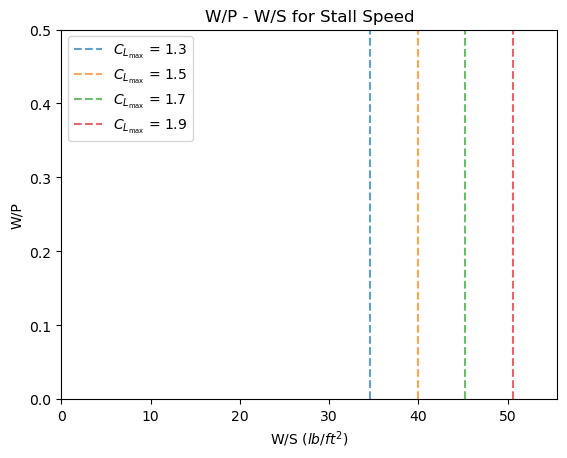

In [51]:
# Setup 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette() 

# CL_max is within 1.3 - 1.9

rho = 1.8685e-3 # slugs/ft^3, assuming average cruise of 8,000 ft
v_stall = 1.68781 * 100 # Convert kts to ft/s
CL_max = np.array([1.3, 1.5, 1.7, 1.9]) # Variable range of CL_max values based on Table 3.1 in Roskam

# Calculate wing loading based on stall speed
W_S = 0.5 * rho * v_stall**2 * CL_max # lb/ft^2 
print(W_S)

# Plot W/S vs W/P
plt.figure()
for i, ws in enumerate(W_S):
    plt.axvline(x=ws, color=colors[i], linestyle='--', alpha=0.7, label=f'$C_{{L_{{\\text{{max}}}}}}$ = {CL_max[i]:.1f}')
plt.title('W/P - W/S for Stall Speed')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("W/P")
plt.xlim(0, max(W_S)+5)
plt.ylim(0, 0.5)
plt.legend(loc='best')
plt.show()

149.54951952464464


(0.0, 50.0)

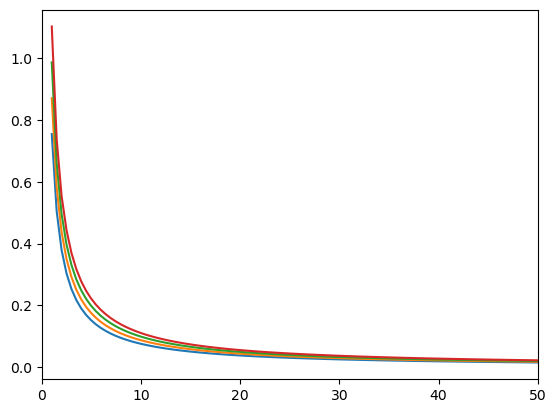

In [52]:
S_TO_G = 1000 # ft
S_TO = 1500 # ft
rho_SL = 23.77e-4 #slugs/ft3

# Relating S_TO to TOP_23
TOP_23 = (-8.134 + np.sqrt(8.314**2 - 4 * 0.0149 * -S_TO)) / (2 * 0.0149)
print(TOP_23)

W_S = np.linspace(1,50,100)
k_s = 1.2
v_TO = k_s * v_stall

plt.figure()

for CL_max in CL_max:
    P_W = (TOP_23 * (rho / rho_SL) * CL_max) / (v_TO * W_S)
    plt.plot(W_S, P_W, label=f'$C_{{L_{{max}}}}$ = {CL_max}')

plt.xlim(0,50)